In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [3]:
boston = load_boston()

In [4]:
df = pd.DataFrame(np.concatenate([X,y.reshape(-1,1)], axis=1), columns=boston.feature_names.tolist() + ['MEDV'])
df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [5]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Training score: {}'.format(lr.score(X_train, y_train)))
print('Test score: {}'.format(lr.score(X_test, y_test)))

y_pred = lr.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
print('Training RMSE: {}'.format(rmse))

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Test RMSE: {}'.format(rmse))

Training score: 0.7434997532004697
Test score: 0.711226005748496
Training RMSE: 4.748208239685937
Test RMSE: 4.638689926172797


Let's try to improve on this model. 

Start by creating polynomial terms and interaction terms using `sklearn.preprocessing.PolynomialFeatures`. Why could this be useful? 

In [7]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

lr2 = LinearRegression()
lr2.fit(X_train_poly, y_train)
lr2.score(X_train_poly, y_train)

0.9469794920108195

In [8]:
X_test_poly = poly.transform(X_test)
lr2.score(X_test_poly, y_test)

0.6610321969632067

In [9]:
mse = mean_squared_error(y_train, lr2.predict(X_train_poly))
rmse = np.sqrt(mse)

print('RMSE: {}'.format(rmse))

RMSE: 2.1587771167948904


In [10]:
mse = mean_squared_error(y_test, lr2.predict(X_test_poly))
rmse = np.sqrt(mse)

print('RMSE: {}'.format(rmse))

RMSE: 5.025688042657493


> This is overfitting!!! The model with polynomial features doesn't generalize well to unseen data. 
- - - 

Try regularization with polynomial features and interaction terms!

When regularizing, we need to scale the features first. 

**Why?**  

> The L1-norm and L2-norm added to the linear regression cost function penalize large values of all coefficients equally. 

> Lasso and ridge regression constraint the size of the coefficients associated to each variable. However, this value will depend on the magnitude of each variable,so you need scale the variables beforehand.



In [11]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_poly = poly.fit_transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

Ridge: 

In [12]:
ridge = Ridge(alpha=10,random_state=1)
ridge.fit(X_train_scaled_poly, y_train)
ridge.score(X_train_scaled_poly, y_train)

0.9322063334864211

In [13]:
ridge.score(X_test_scaled_poly, y_test)

0.8038169683868277

In [14]:
np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_scaled_poly)))

2.4410710769597515

In [15]:
np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_scaled_poly)))

3.823376123713987

> Better than the baseline model. Better generalization to unseen data. 

In [16]:
lasso = Lasso(alpha=0.3, random_state=1)
lasso.fit(X_train_scaled_poly, y_train)
lasso.score(X_train_scaled_poly, y_train)

0.8575294192309941

In [17]:
lasso.score(X_test_scaled_poly, y_test)

0.7884638325042947

In [18]:
np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_scaled_poly)))

3.53873841829848

In [19]:
np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_scaled_poly)))

3.970165571442558

> Also better than baseline! Better generalization to unseen data!

- - - 

In [20]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('Advertising.csv')
df.head(1)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1


In [21]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df[['TV','radio','newspaper']],
                                                    df['sales'], random_state=1)

In [23]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
lr1.score(X_test, y_test)

0.9156213613792233

In [24]:
def adjusted_r2(X, y, fitted_model):
    r2 = fitted_model.score(X, y)
    n = X.shape[0]
    k = X.shape[1]
    adj_r2 = 1 - ((1-r2)*(n-1))/(n - k - 1)
    return adj_r2

adjusted_r2(X_test, y_test, lr1)

0.910118406686564

In [25]:
mean_squared_error(y_train, lr1.predict(X_train))

3.0867913468291355

In [26]:
mean_squared_error(y_test, lr1.predict(X_test))

1.9730456202283368

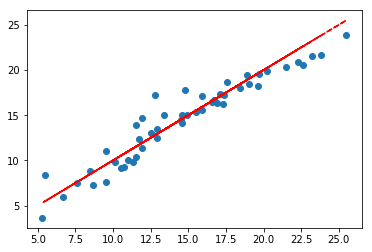

In [27]:
plt.scatter(y_test, lr1.predict(X_test))
plt.plot(y_test, y_test, ls='dashed', color='r')

In [28]:
# Add an interaction term

df['TV*newspaper'] = df['TV'] * df['newspaper']

df.head(1)

,TV,radio,newspaper,sales,TV*newspaper
0,230.1,37.8,69.2,22.1,15922.92


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('sales', axis=1), 
                                                    df['sales'], random_state=1)

In [30]:
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
lr2.score(X_test, y_test)

0.918518449092768

In [31]:
adjusted_r2(X_test, y_test, lr2)

0.9112756445676807

In [32]:
mean_squared_error(y_train, lr2.predict(X_train))

2.8870180753227146

In [33]:
mean_squared_error(y_test, lr2.predict(X_test))

1.9053023345098206

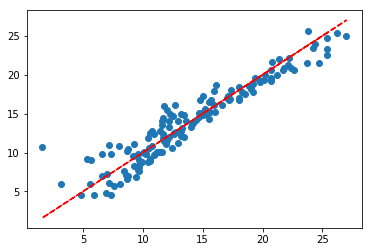

In [34]:
plt.scatter(y_train, lr2.predict(X_train))
plt.plot(y_train, y_train, ls='dashed', color='r')

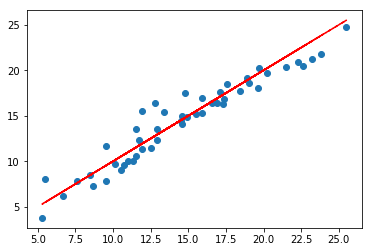

In [35]:
plt.scatter(y_test, lr2.predict(X_test))
plt.plot(y_test, y_test, ls='dashed', color='r')

> Adding the interaction term resulted in training a better model! 

In [36]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[['TV','radio','newspaper']])

In [37]:
X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names(['TV','radio','newspaper']))

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, df['sales'], random_state=1)

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
lin_reg.score(X_test, y_test)

0.9895787446246711

In [41]:
adjusted_r2(X_test, y_test, lin_reg)

0.9872339621652221

In [42]:
mean_squared_error(y_train, lin_reg.predict(X_train))

0.41742440328701985

In [43]:
mean_squared_error(y_test, lin_reg.predict(X_test))

0.24368267385758263

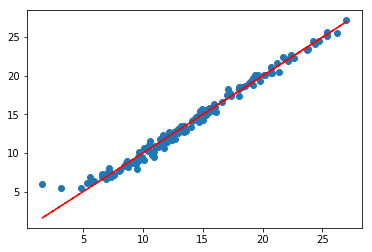

In [44]:
plt.scatter(y_train, lin_reg.predict(X_train))
plt.plot(y_train, y_train, ls='dashed', color='r')

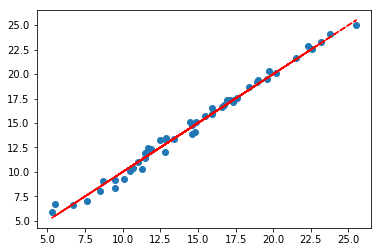

In [45]:
plt.scatter(y_test, lin_reg.predict(X_test))
plt.plot(y_test, y_test, ls='dashed', color='r')

## Regularization 

### Bias and Variance

High bias is easy to wrap one's mind around: Imagine pulling three red balls from an urn that has hundreds of balls of all colors in a uniform distribution. Then my sample is a terrible representative of the whole population. If I were to build a model by extrapolating from my sample, that model would predict that _every_ ball produced would be red! That is, this model would be incredibly biased.

High variance is a little bit harder to visualize, but it's basically the "opposite" of this. Imagine that the population of balls in the urn is mostly red, but also that there are a few balls of other colors floating around. Now imagine that our sample comprises a few balls, none of which is red. In this case, we've essentially picked up on the "noise", rather than the "signal". If I were to build a model by extrapolating from my sample, that model would be needlessly complex. It might predict that balls drawn before noon will be orange and that balls drawn after 8pm will be green, when the reality is that a simple model that predicted 'red' for all balls would be a superior model!

The important idea here is that there is a _trade-off_: If we have too few data in our sample (training set), or too few predictors, we run the risk of high _bias_, i.e. an underfit model. On the other hand, if we have too many predictors (especially ones that are collinear), we run the risk of high _variance_, i.e. an overfit model.

https://en.wikipedia.org/wiki/Overfitting#/media/File:Overfitting.svg

### Changing Our Loss Function

Suppose I have split my data into training and testing sets. Do I want my model to fit my training data _exactly_ ?

Often, the answer is actually 'NO!', because doing that will lead to an overfit model.

Overfitting is generally a result of high variance. High variance can be caused by:
- having irrelevant or too many predictors
- multicollinearity
- large coefficients

The first problem is about picking up on noise rather than signal.
The second problem is about having a least-squares estimate that is highly sensitive to random error.
The third is about having highly sensitive predictors.

Regularization is about introducing a factor into our model designed to enforce the stricture that the coefficients stay small, by penalizing the ones that get too large.

That is, we'll alter our loss function so that the goal now is not merely to minimize the difference between actual values and our model's predicted values. Rather, we'll add in a term to our loss function that represents the sizes of the coefficients.

There are two popular ways of doing this:

Lasso ("L1") Regularization: 

Minimize $\large\Sigma^{n_{obs.}}_{i=1}[(y_i - \Sigma^{n_{feat.}}_{j=0}\beta_j \times x_{ij})^2]+ \lambda\space\Sigma^{n_{feat.}}_{j=0}|\beta_j|$
<br/> <br/>

Ridge ("L2") Regularization: 

Minimize $\large\Sigma^{n_{obs.}}_{i=1}[(y_i - \Sigma^{n_{feat.}}_{j=0}\beta_j \times x_{ij})^2] + \lambda\space\Sigma^{n_{feat.}}_{j=0}\beta^2_j$

**$\rightarrow$ Don't let these formulas be intimidating. The first term in each of these (the sum of squares) is the same, and is just the familiar cost function (also known as loss function) we use in linear regression.**

What distinguishes the Lasso Regression from the Ridge Regression is only the additional term on the right. 
* The Lasso uses the absolute values of the coefficients
* The Ridge uses the squares of the coefficients. 

For a given value of $\lambda$, the Ridge makes for a gentler reining in of runaway coefficients. The Lasso will more quickly reduce the contribution of individual predictors down to insignificance.

For a nice discussion of these methods in Python, see https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b.